## Plot Bbarolo fit parameters following the style of BBarolo's plot_parameters.pdf.

In [1]:
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt 
from astropy.table import Table
from edge_pydb import EdgeTable
matplotlib.rc('xtick',direction='in') 
matplotlib.rc('ytick',direction='in') 

In [2]:
# PARAMETERS: plotting the fit parameters 
def plotparam(gal, tablename, savefig=False, outfolder=''):
    table = EdgeTable(tablename)
    galrows = table[table['Name']==gal]
    freepa = tablename.replace('.csv','_freepa.csv')
    table2 = EdgeTable(freepa)
    galrows2 = table2[table2['Name']==gal]
    twostage=True 
    if len(galrows) == 0:
        print (gal + ' has no data in table',tablename)
        twostage = False
    if len(galrows2) == 0:
        print (gal + ' has no data in table',freepa)
        return

    rad  = galrows2['bbRad']
    vrot = galrows2['bbVrot']
    disp = galrows2['bbVdisp']
    inc  = galrows2['bbInc']
    pa   = galrows2['bbPA']
    z0   = galrows2['bbZ0']
    xpos = galrows2['bbXpos']
    ypos = galrows2['bbYpos']
    vsys = galrows2['bbVmean']
    vrad = [0]*len(galrows2)
    err1_l, err1_h = np.zeros(shape=(10,len(rad))), np.zeros(shape=(10,len(rad)))
    color=color2='#B22222' 
    max_vrot,max_vdisp,max_inc,max_pa=np.max(vrot),np.max(disp),np.max(inc),np.max(pa) 
    max_z0,max_xpos,max_ypos,max_vsys=np.max(z0),np.max(xpos),np.max(ypos),np.max(vsys) 
    max_rad = 1.1*np.max(rad)
    err1_l[0] = galrows2['bbVrot_e1']
    err1_h[0] = galrows2['bbVrot_e2']
    err1_l[1] = galrows2['bbVdisp_e1']
    err1_h[1] = galrows2['bbVdisp_e2']
    err1_l[5] = galrows2['bbPA_e1']
    err1_h[5] = galrows2['bbPA_e2']
    err1_l[8] = galrows2['bbVmean_e1']
    err1_h[8] = galrows2['bbVmean_e2']

    if twostage:
        rad2  = galrows['bbRad']
        vrot2 = galrows['bbVrot']
        disp2 = galrows['bbVdisp']
        inc2  = galrows['bbInc']
        pa2   = galrows['bbPA']
        z02   = galrows['bbZ0']
        xpos2 = galrows['bbXpos']
        ypos2 = galrows['bbYpos']
        vsys2 = galrows['bbVmean']
        vrad2 = [0]*len(galrows)
        err2_l, err2_h = np.zeros(shape=(10,len(rad2))), np.zeros(shape=(10,len(rad2)))
        color='#A0A0A0' 
        max_vrot, max_vdisp, max_inc, max_pa = (np.maximum(max_vrot,np.max(vrot2)),
                                                np.maximum(max_vdisp,np.max(disp2)),
                                                np.maximum(max_inc,np.max(inc2)),
                                                np.maximum(max_pa,np.max(pa2)))
        max_z0, max_xpos, max_ypos, max_vsys = (np.maximum(max_z0,np.max(z02)),
                                                np.maximum(max_xpos,np.max(xpos2)),
                                                np.maximum(max_ypos,np.max(ypos2)),
                                                np.maximum(max_vsys,np.max(vsys2)))
        err2_l[0] = galrows['bbVrot_e1']
        err2_h[0] = galrows['bbVrot_e2']
        err2_l[1] = galrows['bbVdisp_e1']
        err2_h[1] = galrows['bbVdisp_e2']
        surfdens  = galrows['bbIntens']
        sd_err    = galrows['bbIntensRMS']
        bunit = galrows['bbIntens'].unit.to_string()
    else:
        bunit = ''

    fig1 = plt.figure(figsize=(11.69,8.27), dpi=150)  
    plt.rc('font',family='sans-serif',serif='Helvetica',size=10)  
    params = {'text.usetex':False, 'mathtext.fontset':'cm', 'mathtext.default':'regular', 'errorbar.capsize':0} 
    plt.rcParams.update(params) 
    fig_ratio = 11.69/8.27 
    nrows, ncols = 3,3 
    x_axis_length, y_axis_length = 0.27, 0.13 
    x_sep, y_sep = 0.07,0.015 
    ax, bottom_corner = [], [0.1,0.7]
    for i in range (nrows): 
        bottom_corner[0], axcol, ylen = 0.1, [], y_axis_length 
        if i==0: ylen *= 1.8 
        for j in range (ncols): 
            axcol.append(fig1.add_axes([bottom_corner[0],bottom_corner[1],x_axis_length,ylen*fig_ratio])) 
            bottom_corner[0]+=x_axis_length+x_sep 
        ax.append(axcol) 
        bottom_corner[1]-=(y_axis_length+y_sep)*fig_ratio 

    axis=ax[0][0]  
    axis.tick_params(axis='both',which='both',bottom='on',top='on',labelbottom='off',labelleft='on')  
    axis.set_xlim(0,max_rad)  
    axis.set_ylim(0,1.2*max_vrot)  
    axis.set_ylabel('v$_\mathrm{rot}$ (km/s)', fontsize=14)  
    axis.errorbar(rad, vrot, yerr=[err1_l[0],-err1_h[0]], fmt='o', color=color)  
    if twostage: axis.errorbar(rad2, vrot2, yerr=[err2_l[0],-err2_h[0]], fmt='o', color=color2) 

    axis=ax[1][0]  
    axis.set_xlim(0,max_rad)  
    axis.set_ylabel('i (deg)', fontsize=14)  
    axis.tick_params(axis='both',which='both',bottom='on',top='on',labelbottom='off',labelleft='on') 
    axis.errorbar(rad, inc, yerr=[err1_l[4],-err1_h[4]], fmt='o', color=color)  
    if twostage: axis.errorbar(rad2, inc2, yerr=[err2_l[4],-err2_h[4]], fmt='o-', color=color2) 

    axis=ax[2][0]  
    axis.set_xlim(0,max_rad)  
    axis.set_ylabel('$\phi$ (deg)', fontsize=14)  
    axis.set_xlabel('Radius (arcsec)', fontsize=14, labelpad=10) 
    axis.tick_params(axis='both',which='both',bottom='on',top='on',labelbottom='on',labelleft='on')  
    axis.errorbar(rad, pa, yerr=[err1_l[5],-err1_h[5]], fmt='o', color=color)  
    if twostage: axis.errorbar(rad2, pa2, yerr=[err2_l[5],-err2_h[5]], fmt='o-', color=color2)  

    axis=ax[0][1]  
    axis.set_xlim(0,max_rad)  
    axis.set_ylim(0,1.2*max_vdisp)  
    axis.set_ylabel('$\sigma_\mathrm{gas}$  (km/s)', fontsize=14)  
    axis.tick_params(axis='both',which='both',bottom='on',top='on',labelbottom='off',labelleft='on') 
    axis.errorbar(rad, disp, yerr=[err1_l[1],-err1_h[1]], fmt='o', color=color)  
    if twostage: axis.errorbar(rad2, disp2, yerr=[err2_l[1],-err2_h[1]], fmt='o', color=color2)  

    axis=ax[1][1]  
    axis.set_xlim(0,max_rad)  
    axis.set_ylabel('x$_0$ (pix)', fontsize=14)  
    axis.tick_params(axis='both',which='both',bottom='on',top='on',labelbottom='off',labelleft='on')   
    axis.errorbar(rad, xpos, yerr=[err1_l[6],-err1_h[6]], fmt='o', color=color)  
    if twostage: axis.errorbar(rad2, xpos2, yerr=[err2_l[6],-err2_h[6]], fmt='o-', color=color2)  

    axis=ax[2][1]  
    axis.set_xlim(0,max_rad)  
    axis.set_ylabel('y$_0$ (pix)', fontsize=14)  
    axis.set_xlabel('Radius (arcsec)', fontsize=14, labelpad=10) 
    axis.tick_params(axis='both',which='both',bottom='on',top='on',labelbottom='on',labelleft='on')  
    axis.errorbar(rad, ypos, yerr=[err1_l[7],-err1_h[7]], fmt='o', color=color)  
    if twostage: axis.errorbar(rad2, ypos2, yerr=[err2_l[7],-err2_h[7]], fmt='o-', color=color2) 

    axis=ax[0][2]  
    axis.set_xlim(0,max_rad)  
    axis.set_ylabel('$\Sigma}$ ('+bunit+')', fontsize=14)  
    axis.tick_params(axis='both',which='both',bottom='on',top='on',labelbottom='off',labelleft='on')  
    if twostage: axis.errorbar(rad2, surfdens, yerr=sd_err, fmt='o', color=color2)  

    axis=ax[1][2]  
    axis.set_xlim(0,max_rad)  
    axis.set_ylabel('V$_\mathrm{rad}$ (km/s)', fontsize=14)  
    axis.tick_params(axis='both',which='both',bottom='off',top='on',labelbottom='off',labelleft='on')  
    axis.errorbar(rad, vrad, yerr=[err1_l[9],-err1_h[9]], fmt='o', color=color)  
    if twostage: axis.errorbar(rad2, vrad2, yerr=[err2_l[9],-err2_h[9]], fmt='o', color=color2)  

    axis=ax[2][2]  
    axis.set_xlim(0,max_rad) 
    axis.set_ylabel('v$_\mathrm{sys}$ (km/s)', fontsize=14) 
    axis.set_xlabel('Radius (arcsec)', fontsize=14, labelpad=10) 
    axis.tick_params(axis='both',which='both',bottom='on',top='on',labelbottom='on',labelleft='on')  
    axis.errorbar(rad, vsys, yerr=[err1_l[8],-err1_h[8]], fmt='o', color=color)  
    if twostage: axis.errorbar(rad2, vsys2, yerr=[err2_l[8], -err2_h[8]], fmt='o', color=color2) 

    if savefig:
        plt.savefig(outfolder+gal+'_plot_parameters.pdf', orientation='landscape', 
                    format='pdf', bbox_inches='tight') 
    return

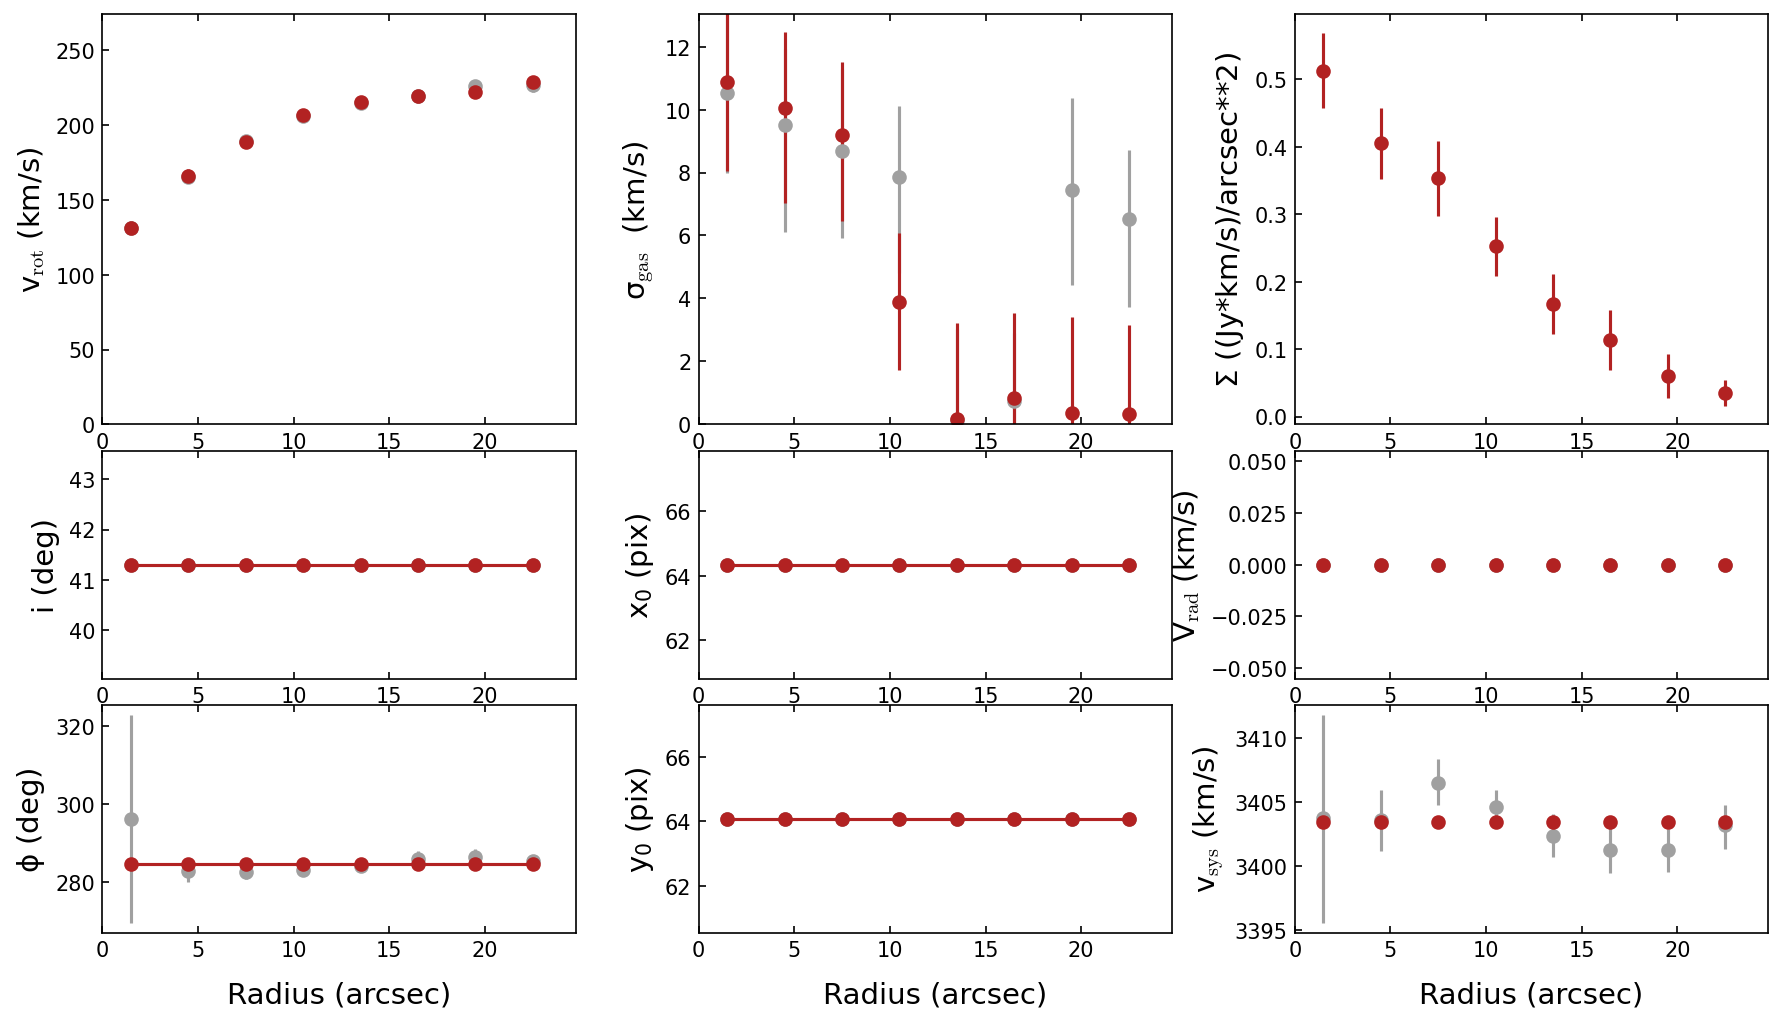

In [3]:
plotparam('NGC4047', 'bb_natv_fitvd_dilmsk.csv')